In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [77]:
#Lee ambos archivos, los concatena y elimina la columna target ya que peak cumple el mismo rol.
df1=pd.read_csv('absorption.csv')
df2 = pd.read_csv('absorption.txt')
df= pd.concat([df1, df2], axis=1)
df.drop('target', axis=1, inplace=True)

In [78]:
#De acuerdo a la columna name, se extrae la información de la mutación y se crea una columna para cada uno de los datos.
def extract_mutation_info(name):
    matches = re.findall(r'([A-Z])(\d+)([A-Z]+)', name)
    if matches:
        origins, positions, mutations = [], [], []
        for match in matches:
            origin, position, mutation = match
            origins.append(origin)
            positions.append(int(position))
            mutations.append(mutation)
        return origins, positions, mutations
    else:
        return None, None, None
df['origin'], df['position'], df['mutation'] = zip(*df['name'].apply(extract_mutation_info))

In [79]:
#Se les asigna una categoria dependiendo del tipo de mutación (positiva o negativa).
category=[]
for i in range(len(df)):
    value_check=df["peak"][i]

    if value_check>=539:
        category.append("1")
    else:
        category.append("0")
df["cat"]=category

In [80]:
#Cuenta la cantidad de mutaciones positivas y negativas 0 para las negativas y 1 para las positivas.
df["cat"].value_counts()

cat
0    50
1    31
Name: count, dtype: int64

In [81]:
#Se crea un dataframe para las mutaciones positivas y otro para las negativas, luego se ordenan de menor a mayor y se resetean los indices.
df_positive=df.loc[df["cat"]=="1"]
df_negative=df.loc[df["cat"]=="0"]
df_positive=df_positive.sort_values(by="peak",ascending=True)
df_negative=df_negative.sort_values(by="peak",ascending=True)
df_negative=df_negative.reset_index(drop=True)
df_positive=df_positive.reset_index(drop=True)

In [82]:
#Se toman los datos de la columna origin la cual representan los aminoacidos wild type de las mutaciones positivas.
df_origin_positive=[]

for i in range(len(df_positive["origin"])):
    if df_positive["origin"][i]!=None:
        for j in range(len(df_positive["origin"][i])):
            letter=df_positive["origin"][i][j]
            df_origin_positive.append(letter)
df_origin_positive=pd.DataFrame(df_origin_positive)
df_origin_positive.columns=["letter"]

In [83]:
df_origin_negative=[]

for i in range(len(df_negative["origin"])):
    if df_negative["origin"][i]!=None:
        for j in range(len(df_negative["origin"][i])):
            letter=df_negative["origin"][i][j]
            df_origin_negative.append(letter)
df_origin_negative=pd.DataFrame(df_origin_negative)
df_origin_negative.columns=["letter"]

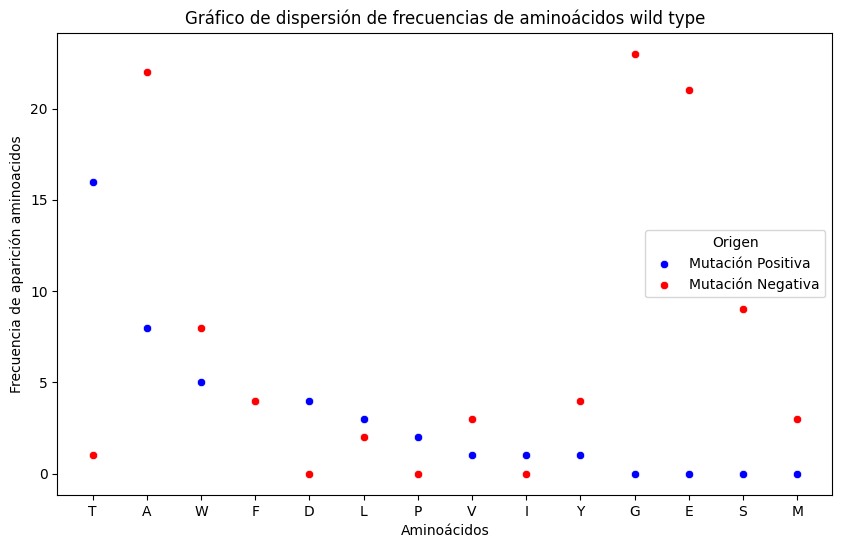

In [84]:
#Se cuentan la cantidad de repeticiones de cada aminoacido en las mutaciones positivas de los aminoacidos wild type y se guardan en un dataframe.
letter_frequencies_positive = df_origin_positive['letter'].value_counts().reset_index()
letter_frequencies_positive.columns = ['letter', 'frequency_positive']

letter_frequencies_negative = df_origin_negative['letter'].value_counts().reset_index()
letter_frequencies_negative.columns = ['letter', 'frequency_negative']

#Se combinan las frecuencias de ambas categorías para tenerlas en un mismo grafico
letter_frequencies_combined = letter_frequencies_positive.merge(letter_frequencies_negative, on='letter', how='outer').fillna(0)

#Se crea un gráfico de dispersión con colores diferentes para Positive y Negative
plt.figure(figsize=(10, 6))
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_positive', color='blue', label='Mutación Positiva')
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_negative', color='red', label='Mutación Negativa')
plt.xlabel("Aminoácidos")
plt.ylabel("Frecuencia de aparición aminoacidos")
plt.title("Gráfico de dispersión de frecuencias de aminoácidos wild type")
plt.legend(title="Origen")
plt.show()


In [85]:
df_mutation_positive=[]

for i in range(len(df_positive["mutation"])):
    if df_positive["mutation"][i]!=None:
        for j in range(len(df_positive["mutation"][i])):
            letter=df_positive["mutation"][i][j]
            df_mutation_positive.append(letter)
df_mutation_positive=pd.DataFrame(df_mutation_positive)
df_mutation_positive.columns=["letter"]

In [86]:
df_mutation_negative=[]

for i in range(len(df_negative["mutation"])):
    if df_negative["mutation"][i]!=None:
        for j in range(len(df_negative["mutation"][i])):
            letter=df_negative["mutation"][i][j]
            df_mutation_negative.append(letter)
df_mutation_negative=pd.DataFrame(df_mutation_negative)
df_mutation_negative.columns=["letter"]

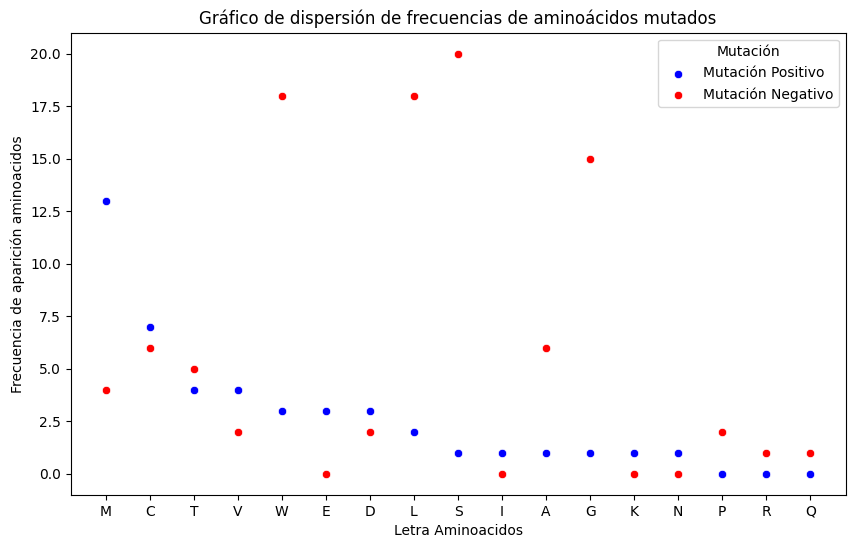

In [87]:
letter_frequencies_positive = df_mutation_positive['letter'].value_counts().reset_index()
letter_frequencies_positive.columns = ['letter', 'frequency_positive']

letter_frequencies_negative = df_mutation_negative['letter'].value_counts().reset_index()
letter_frequencies_negative.columns = ['letter', 'frequency_negative']

letter_frequencies_combined = letter_frequencies_positive.merge(letter_frequencies_negative, on='letter', how='outer').fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_positive', color='blue', label='Mutación Positivo')
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_negative', color='red', label='Mutación Negativo')
plt.xlabel("Letra Aminoacidos")
plt.ylabel("Frecuencia de aparición aminoacidos")
plt.title("Gráfico de dispersión de frecuencias de aminoácidos mutados")
plt.legend(title="Mutación")
plt.show()

In [88]:
df_position_positive=[]

for i in range(len(df_positive["position"])):
    if df_positive["position"][i]!=None:
        for j in range(len(df_positive["position"][i])):
            pos=df_positive["position"][i][j]
            df_position_positive.append(pos)
df_position_positive=pd.DataFrame(df_position_positive)
df_position_positive.columns=["position"]

In [89]:
df_position_negative=[]

for i in range(len(df_negative["position"])):
    if df_negative["position"][i]!=None:
        for j in range(len(df_negative["position"][i])):
            pos=df_negative["position"][i][j]
            df_position_negative.append(pos)
df_position_negative=pd.DataFrame(df_position_negative)
df_position_negative.columns=["position"]

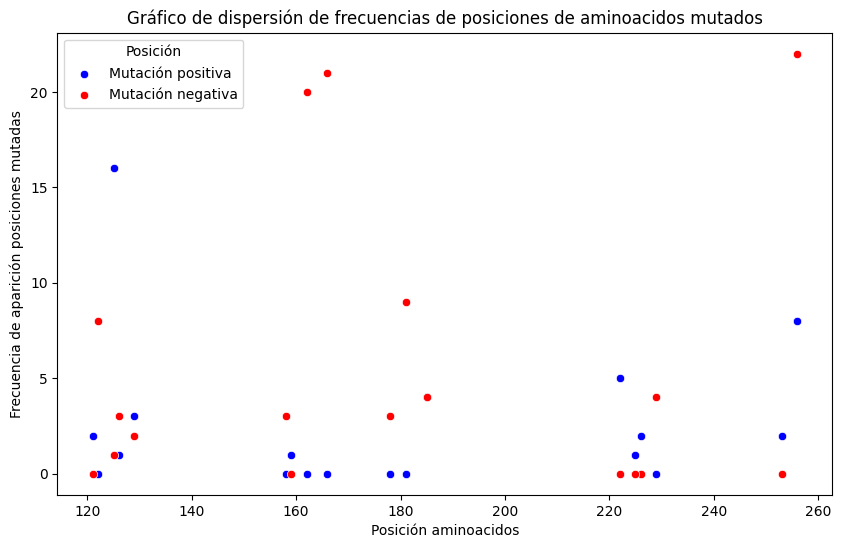

In [90]:
frequencies_positive = df_position_positive['position'].value_counts().reset_index()
frequencies_positive.columns = ['position', 'frequency_positive']

frequencies_negative = df_position_negative['position'].value_counts().reset_index()
frequencies_negative.columns = ['position', 'frequency_negative']

frequencies_combined = frequencies_positive.merge(frequencies_negative, on='position', how='outer').fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=frequencies_combined, x='position', y='frequency_positive', color='blue', label='Mutación positiva')
sns.scatterplot(data=frequencies_combined, x='position', y='frequency_negative', color='red', label='Mutación negativa')
plt.xlabel("Posición aminoacidos")
plt.ylabel("Frecuencia de aparición posiciones mutadas")
plt.title("Gráfico de dispersión de frecuencias de posiciones de aminoacidos mutados")
plt.legend(title="Posición")
plt.show()